<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Credit_card_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBoost Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56735    15]
 [    0 56976]]


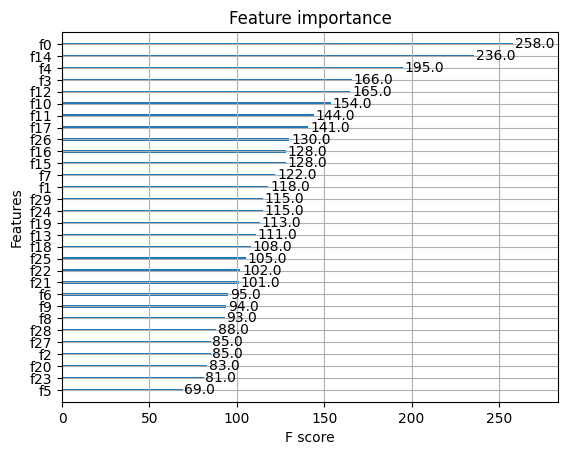

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")  # Replace with your actual file name
X = df.drop('Class', axis=1)
y = df['Class']

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Evaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Feature importance plot
xgb.plot_importance(xgb_model)
plt.show()
